In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2023/players.csv
/kaggle/input/nfl-big-data-bowl-2023/week6.csv
/kaggle/input/nfl-big-data-bowl-2023/week2.csv
/kaggle/input/nfl-big-data-bowl-2023/pffScoutingData.csv
/kaggle/input/nfl-big-data-bowl-2023/week3.csv
/kaggle/input/nfl-big-data-bowl-2023/week8.csv
/kaggle/input/nfl-big-data-bowl-2023/games.csv
/kaggle/input/nfl-big-data-bowl-2023/week5.csv
/kaggle/input/nfl-big-data-bowl-2023/week7.csv
/kaggle/input/nfl-big-data-bowl-2023/week1.csv
/kaggle/input/nfl-big-data-bowl-2023/week4.csv
/kaggle/input/nfl-big-data-bowl-2023/plays.csv


In [18]:
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return 12*ft_ + in_



In [3]:
players = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/players.csv")

In [4]:
print(players.head())

   nflId height  weight   birthDate collegeName officialPosition  \
0  25511    6-4     225  1977-08-03    Michigan               QB   
1  28963    6-5     240  1982-03-02   Miami, O.               QB   
2  29550    6-4     328  1982-01-22    Arkansas                T   
3  29851    6-2     225  1983-12-02  California               QB   
4  30078    6-2     228  1982-11-24     Harvard               QB   

          displayName  
0           Tom Brady  
1  Ben Roethlisberger  
2        Jason Peters  
3       Aaron Rodgers  
4    Ryan Fitzpatrick  


In [6]:
print(players["officialPosition"].unique())

['QB' 'T' 'TE' 'WR' 'DE' 'SS' 'C' 'FS' 'NT' 'DT' 'CB' 'G' 'OLB' 'RB' 'MLB'
 'ILB' 'LB' 'FB' 'DB']


In [33]:
ol_position_list = ["T","C","G"]
ol_players = players.loc[players['officialPosition'].isin(ol_position_list)]

In [35]:
ol_players.head()

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
6,30869,6-7,330,1981-12-12,Louisiana State,T,Andrew Whitworth
8,33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown
15,34457,6-4,330,1987-01-25,Alabama,T,Andre Smith
17,34472,6-4,311,1985-11-19,California,C,Alex Mack


In [36]:
 ol_players["height_in"] = ol_players["height"].apply(lambda x:parse_ht(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


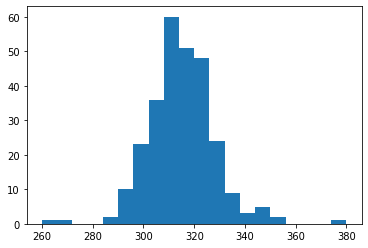

In [13]:
plt.hist(ol_players[["weight"]],bins=20)
plt.show()

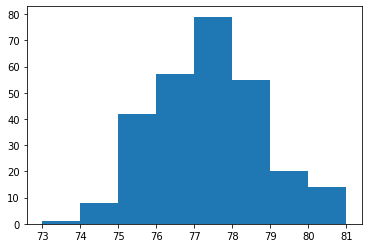

In [38]:
plt.hist(ol_players[["height_in"]],bins=8)
plt.show()

In [42]:
college_summary = ol_players.groupby('collegeName')["collegeName"].agg(['count'])

In [49]:
college_summary.sort_values("count",ascending=False).head(10)

,count
collegeName,
Ohio State,8
Iowa,8
Louisiana State,8
Michigan,8
Alabama,7
Oklahoma,7
Florida,6
Notre Dame,6
Wisconsin,6


108

In [5]:
games = pd.read_csv("../input/nfl-big-data-bowl-2023/games.csv")

In [9]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN


In [7]:
scout_data = pd.read_csv("../input/nfl-big-data-bowl-2023/pffScoutingData.csv")

In [8]:
scout_data.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0
